In [ ]:
import pandas as pd
from io import StringIO
df = pd.read_csv('/content/TreeCoverLoss_2001-2020 _InPrimaryForest.csv')

In [ ]:
df.head()

,CountryCode,Year,TreeCoverLoss_ha,GrossEmissions_Co2_all_gases_Mg
0,AGO,2001,4957.597965,3.021078e+06
1,ARG,2001,5979.947498,2.253298e+06
2,AUS,2001,0.075922,2.885012e+01
3,BDI,2001,6.222930,3.288072e+03
4,BES,2001,0.146932,6.125723e+01


In [ ]:
df.shape

(1863, 4)

In [ ]:
df.columns

Index(['CountryCode', 'Year', 'TreeCoverLoss_ha',
       'GrossEmissions_Co2_all_gases_Mg'],
      dtype='object')

In [ ]:
df.dtypes

,0
CountryCode,object
Year,int64
TreeCoverLoss_ha,float64
GrossEmissions_Co2_all_gases_Mg,float64


In [ ]:
df.isna().sum()

,0
CountryCode,0
Year,0
TreeCoverLoss_ha,0
GrossEmissions_Co2_all_gases_Mg,0


In [ ]:
df[df["TreeCoverLoss_ha"] > 2000]

,CountryCode,Year,TreeCoverLoss_ha,GrossEmissions_Co2_all_gases_Mg
0,AGO,2001,4957.597965,3.021078e+06
1,ARG,2001,5979.947498,2.253298e+06
8,BOL,2001,36529.527880,2.020992e+07
9,BRA,2001,465542.983600,2.937978e+08
12,CAF,2001,3939.636294,2.674137e+06
...,...,...,...,...
1853,TZA,2020,3466.098368,1.670596e+06
1854,UGA,2020,3585.096071,1.730171e+06
1856,VEN,2020,53701.673320,2.989971e+07
1858,VNM,2020,32619.892720,2.396140e+07


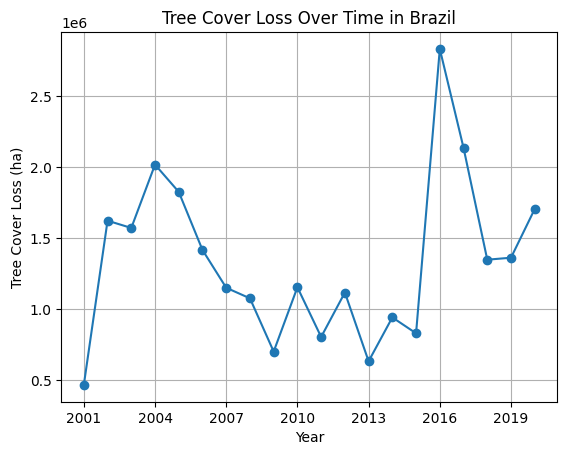

In [ ]:
import matplotlib.pyplot as plt
country_code = 'BRA'
country_df = df[df['CountryCode'] == country_code]
plt.plot(country_df['Year'], country_df['TreeCoverLoss_ha'], marker='o')
plt.xticks(country_df['Year'][::3])
plt.xlabel('Year')
plt.ylabel('Tree Cover Loss (ha)')
plt.title(f'Tree Cover Loss Over Time in Brazil')
plt.grid(True)